# Custom Legends
____

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt
import webbrowser
from IPython.display import YouTubeVideo

C:\Users\PC\Miniconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [13]:
style.use('fivethirtyeight')

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

MA1 = 10
MA2 = 30
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas    = np.convolve(values, weights, 'valid')
    return smas

def graph_data(stock):

    fig = plt.figure(facecolor = '#f0f0f0') # face color
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 1, colspan = 1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan = 4, colspan = 1, sharex = ax1) # share xaxis with ax1  
    plt.ylabel('Price')
    ax2v = twinx()
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1) # share xaxis with ax1
    plt.ylabel('MAvgs')
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2 - 1:])
    
    h_1 = list(map(lambda x, y: x - y, highp, lowp))
    
    ax1.plot_date(date[-start:], h_1[-start:],'-', Label = 'H-L')
    ax1.yaxis.set_major_locater(mticker.MaxNLocator(nbins = 4, prune = 'lower'))
    
    candlestick_ohlc(ax2, ohlc[-start:], width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

   
    ax2.yaxis.set_major_locater(mticker.MaxNLocator(nbins = 7, prune = 'upper'))
    ax2.grid(True)
    bbox_props = dict(boxstyle = 'round', fc = 'w', ec = 'k', lw = 1)
    ax2.annotate(str(closep[-1], (date[-1], closep[-1]), 
                  xytext = (date[-1] + 4, closep[-1]), bbox = bbox_props)
    font_dict = {'family':'serif', 'color': 'dark red', 'size':15}
    ax2.text(date[10], closep[1],'Text Example', fontdict = font_dict)
    ax2.annotate('Big News', (date[11], highp[11]), xytext = (0.8, 0.9), textcoords = 'axes fraction',
                arrowprops = dict(facecolor = 'grey', color = 'grey'))
    
    ax2v.plot([],[], color = '#0079a3', aplha = 0.4, label = 'Volume')             
    ax2v.fill_between(date[-start:], 0, volume[-start:], facecolor = '#0079a3', alpha = 0.4)
    ax2v.axes.yaxis.set_ticklabels([])
    ax2v.grid(False)
    ax2v.set_ylim(0, 3*volum.max())
    ax3.plot(date[-start:], ma1[-start:], linewidth = 1, label = (str(MA1)+ 'MA'))# label added
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1, label = (str(MA2)+ 'MA'))# label added           
    ax3.fill_between(date[-start:], ma1[-start:], 
                     ma2[-start:], where = (ma1[-start:] < ma2[-start:]), 
                     facecolor = 'r', edgecolor = 'r', alpha = 0.5)  
    ax3.fill_between(date[-start:], ma1[-start:], 
                     ma2[-start:], where = (ma1[-start:] > ma2[-start:]), 
                     facecolor = 'g', edgecolor = 'g', alpha = 0.5)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.yaxis.set_major_locater(mticker.MaxNLocator(nbins = 5, prune = 'lower'))
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)                 
                 
    plt.setp(ax1.get_xticklabels(), visibile = False)
    plt.setp(ax2.get_xticklabels(), visibile = False)  
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    # legends
    ax1.legend()
    leg = ax1.legend(loc = 9, ncol = 2, prop = {'size': 11})
    leg.get_frame().set_alpha(0.4)
                 
    ax2v.legend()
    leg = ax2v.legend(loc = 9, ncol = 2, prop = {'size': 11})
    leg.get_frame().set_alpha(0.4)  
                 
    ax3.legend()
    leg = ax3.legend(loc = 9, ncol = 2, prop = {'size': 11})
    leg.get_frame().set_alpha(0.4)                 
    plt.show()
    fig.savefig('google.png', facecolor = fig.get_facecolor())# color 

graph_data('ebay')

SyntaxError: invalid syntax (<ipython-input-13-5380bd5e7363>, line 91)

In [17]:
webbrowser.open('https://pythonprogramming.net/custom-legends-matplotlib-tutorial/')

True

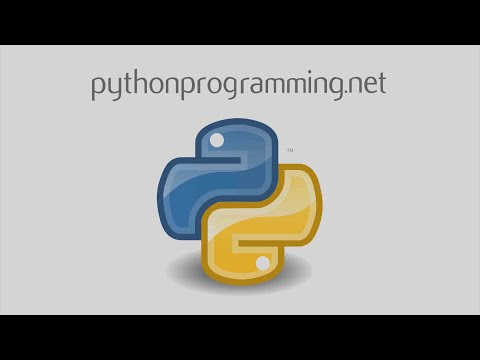

In [2]:
YouTubeVideo('XBksHCvObhQ')

Summary of content on the website
1. typical issue of legends is being on the way of data
2. options t put the legend outside the axis
3. in our case though we have multiple subplots
4. his solutioin is to make the legend a little bit smaller and also apply an alpha to it.
5. To have a legend need to add labels to our data that we want to show up on the legend.
6. added the legend using the line trick (beacuse of fill)
7. invoke the .legend() method to the plots before .show()
8. Changed the location of the legends by passing keyword arguments(kwargs) and .get_frame()
9. ncol lets you specify the number of colums in the legend

summary from the vid
1. Cannot add label to a polygon data, basically any data where there's a fill you cannot add a label 
2. save a file use the button, however the file might save in a view not desires. For example his the background was orange color, altough original was white
3. To solve the issue specify facecolor for the plt.figure color from fivethirtyeight